
#### Figure 2 nonspatial barplots 

### check marker_pval_list

In [21]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
#from tensorflow.keras import Sequential#
#from tensorflow.keras.layers import Dense, Dropout
from matplotlib import pyplot
import numpy as np
import pandas as pd
from collections import Counter
import os

In [22]:
import statannotations


In [23]:
from sklearn.preprocessing import normalize
#import phenograph as pg
from scipy.stats import multivariate_normal, zscore

from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

In [24]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix
import warnings

In [25]:
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name) 
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

In [26]:
import matplotlib.patheffects as PathEffects
import seaborn as sns

In [27]:
from scipy.sparse import csgraph
from numpy import linalg as LA

In [28]:
### roi neighbourhood calculation
from scipy.spatial import distance

from sklearn.metrics.pairwise import euclidean_distances

In [29]:
len(sorted_names)

156

In [30]:
colours_33 = ["firebrick","gold","royalblue","green","dimgray","orchid","darkviolet",
              "red", "orange", "limegreen", "blue", "purple", "seagreen","gold","darkolivegreen",
              "lightpink","thistle","mistyrose","saddlebrown","slategrey","powderblue",
            "palevioletred","mediumvioletred","yellowgreen","lemonchiffon","chocolate",
              "lightsalmon","lightcyan","lightblue", "darkorange","black","darkblue","darkgreen"]


In [31]:
## build the cluster moments

mean_mat_it = [] #1 x genes per entry. K x genes overall
cov_list_it = [] # genes x genes per entry. K genes x genes overall


In [39]:
## read in all the pre-tx data

num_features = 29      
data_CM_1 = np.zeros((1,num_features)) # one row = one image with mean of markers in the columns, defaults to 6 markers 
FoV_path = './fig2_nonspatial/'


for fname in os.listdir(FoV_path):
    print(fname)
    df_1 = pd.read_csv(os.path.join(FoV_path+fname), index_col=None, header= 0)
    df_1 = df_1.fillna(0)
    data_CM_1 = np.concatenate((data_CM_1,df_1),axis=0)

data_CM_1 = np.delete(data_CM_1, (0), axis=0)



36_pre_[42729,13385]_quad_counts_no_mask_no_thresh.csv
33_pre_[50602,15324]_quad_counts_no_mask_no_thresh.csv
41_pre_[45296,14162]_quad_counts_no_mask_no_thresh.csv
44_on_[40266,14822]_quad_counts_no_mask_no_thresh.csv
43_on_[47013,14924]_quad_counts_no_mask_no_thresh.csv
37_pre_[44557,14156]_quad_counts_no_mask_no_thresh.csv
34_pre_[40842,18076]_quad_counts_no_mask_no_thresh.csv
44_pre_[42708,13053]_quad_counts_no_mask_no_thresh.csv
47_pre_[43047,15928]_quad_counts_no_mask_no_thresh.csv
54_on_[36181,16080]_quad_counts_no_mask_no_thresh.csv
34_on_[42281,17835]_quad_counts_no_mask_no_thresh.csv
43_on_[45948,13378]_quad_counts_no_mask_no_thresh.csv
41_on_[39796,11466]_quad_counts_no_mask_no_thresh.csv
47_pre_[40503,15806]_quad_counts_no_mask_no_thresh.csv
37_pre_[43057,13499]_quad_counts_no_mask_no_thresh.csv
34_pre_[43353,13635]_quad_counts_no_mask_no_thresh.csv
41_pre_[45986,16851]_quad_counts_no_mask_no_thresh.csv
33_on_[43797,10397]_quad_counts_no_mask_no_thresh.csv
36_pre_[42653,119

In [40]:
df_1.head

<bound method NDFrame.head of     sample_id treatment status            fov  row   col  quad  \
0          44        on     SD  [37994,14743]    0     0     0   
1          44        on     SD  [37994,14743]    0   201     1   
2          44        on     SD  [37994,14743]    0   402     2   
3          44        on     SD  [37994,14743]    0   603     3   
4          44        on     SD  [37994,14743]    0   804     4   
5          44        on     SD  [37994,14743]    0  1005     5   
6          44        on     SD  [37994,14743]  201     0     6   
7          44        on     SD  [37994,14743]  201   201     7   
8          44        on     SD  [37994,14743]  201   402     8   
9          44        on     SD  [37994,14743]  201   603     9   
10         44        on     SD  [37994,14743]  201   804    10   
11         44        on     SD  [37994,14743]  201  1005    11   
12         44        on     SD  [37994,14743]  402     0    12   
13         44        on     SD  [37994,14743] 

In [41]:
data_CM_1.shape

(2580, 29)

In [42]:
num_markers = 6

In [43]:
data_CM_mean_wtd = np.zeros((data_CM_1.shape[0],num_markers)) #

In [44]:
#np.array(np.where(data_CM_1[:,2]=='SD')).flatten().shape

(1650,)

In [59]:
#print(pre_.shape)
sd_l1 = np.array(np.where(data_CM_1[:,2]=='SD')).flatten()

In [49]:
#np.array(np.where(data_CM_1[:,2]=='PD')).flatten().shape

(930,)

In [60]:
pd_l1 = np.array(np.where(data_CM_1[:,2]=='PD')).flatten()

In [61]:
#np.array(np.where(data_CM_1[:,1]=='on')).flatten().shape
on_ = np.array(np.where(data_CM_1[:,1]=='on')).flatten()
#np.array(np.where(data_CM_1[:,1]=='pre')).flatten().shape
pre_ = np.array(np.where(data_CM_1[:,1]=='pre')).flatten()

In [62]:
print(pre_.shape)
print(on_.shape)

(1440,)
(1140,)


In [63]:
### intersection of rows to create the 4 columns
sd_on = np.intersect1d(sd_l1,on_)
sd_pre = np.intersect1d(sd_l1,pre_)
pd_on = np.intersect1d(pd_l1,on_)
pd_pre = np.intersect1d(pd_l1,pre_)

In [64]:
df2 = pd.DataFrame(df_1)#, columns=['col1', 'col2', 'col3'])


In [65]:
np.std(data_CM_1[sd_pre,12])

2373.0649252171306

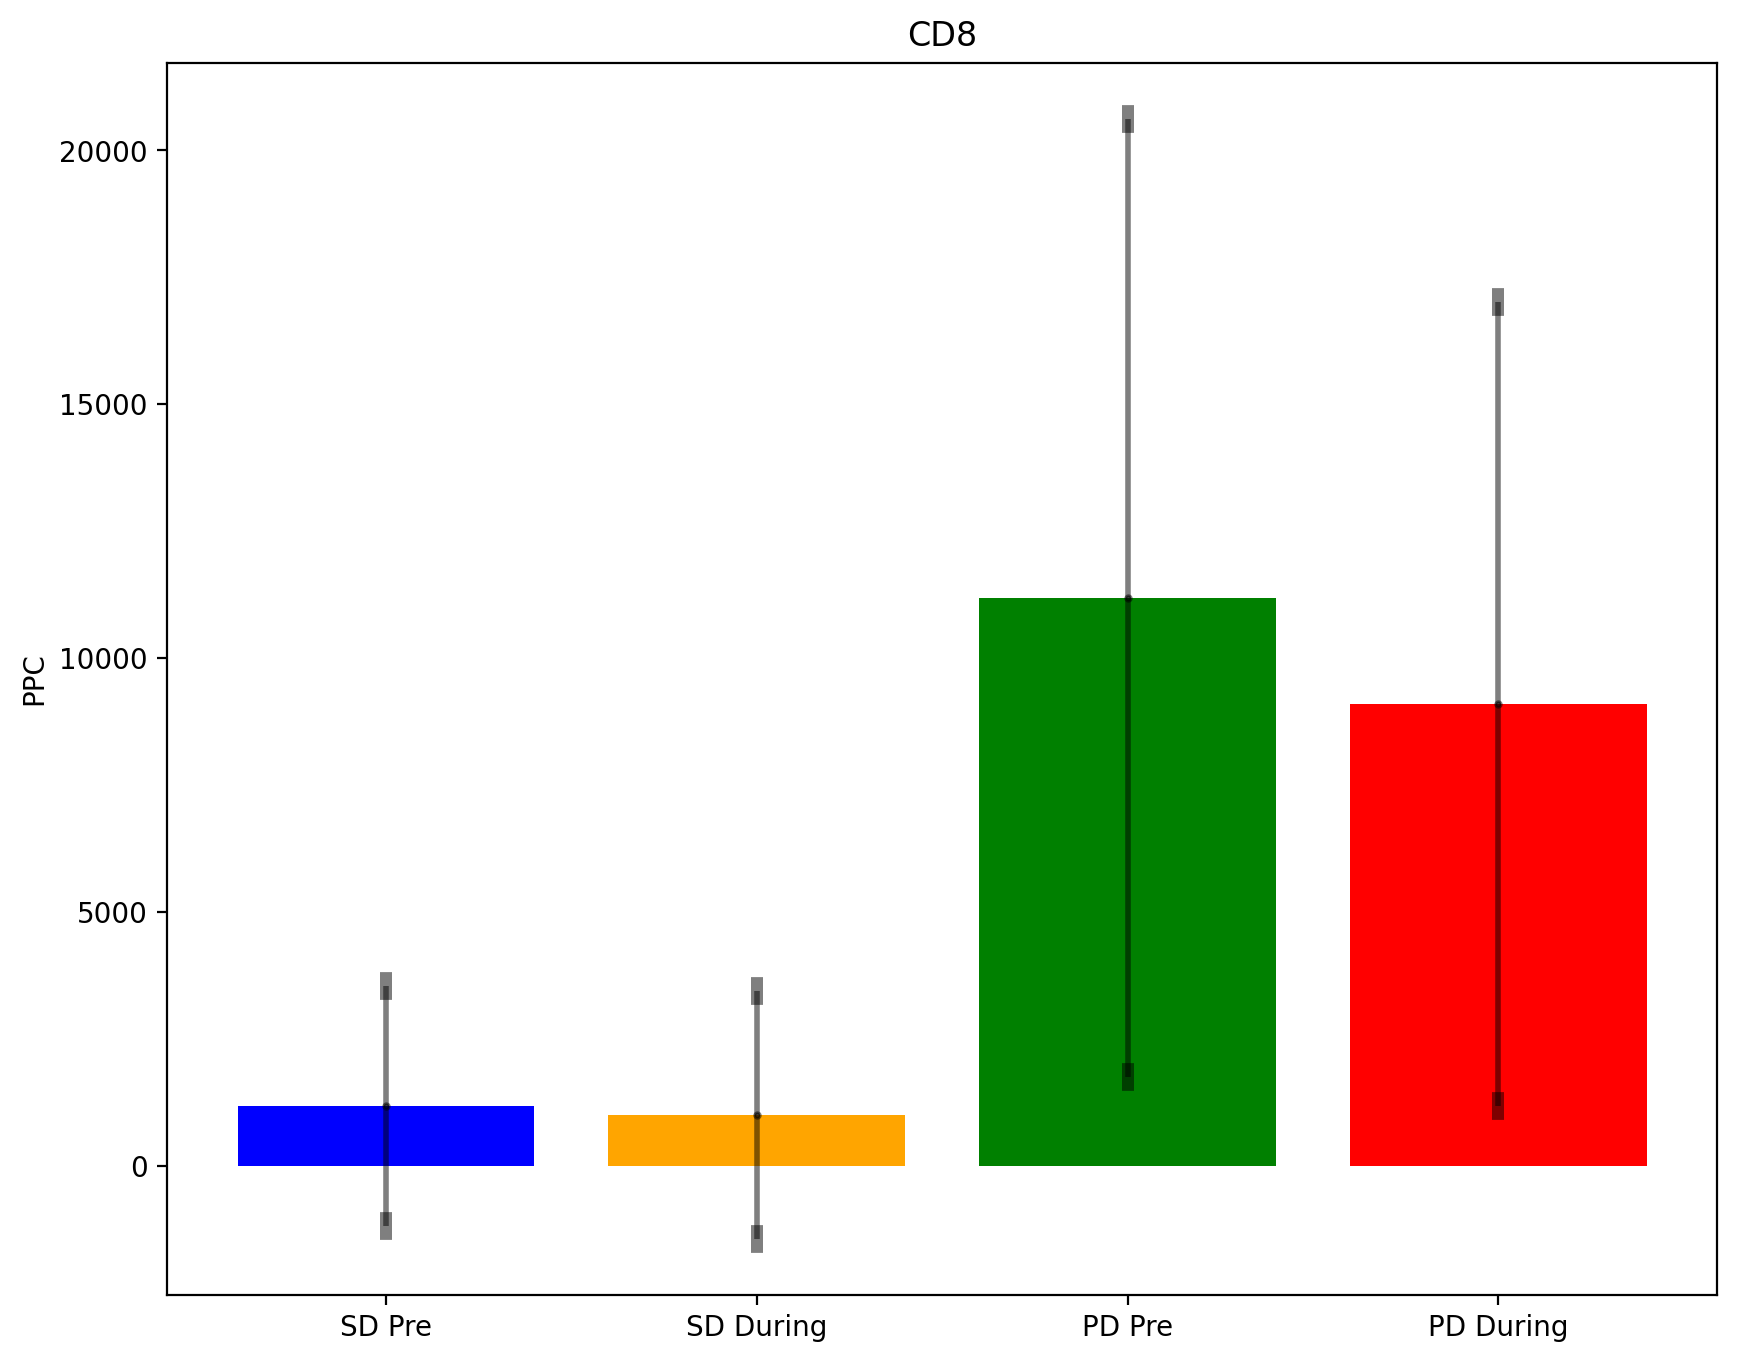

In [66]:
## single plot
import matplotlib.pyplot as plt 
N= 4
x=[0,1,2,3]
m = np.zeros(4,dtype=float)
s = np.zeros(4,dtype=float)
labels = [sd_pre,sd_on,pd_pre,pd_on]

for c in range(N):
    #m[c] = np.log(np.mean(data_CM_1[labels[c],12]))
    #s[c] = np.log(np.std(data_CM_1[labels[c],12]) )


    m[c] = np.mean(data_CM_1[labels[c],12])
    s[c] = np.std(data_CM_1[labels[c],12])
    


y=m
yerr=s
width = 10
height = 8
plt.figure(figsize=(width, height),dpi = 200)
plt.bar(x, y, color=['blue','orange','green','red','lightblue','lightblue','lightblue','palegreen','palegreen','palegreen', 'khaki', 'khaki', 'khaki'])
plt.title('CD8')
#plt.xlabel('Inhibitor concentration (uM)')
plt.ylabel('PPC')
ind = np.arange(N) 
plt.xticks(ind, ('SD Pre', 'SD During', 'PD Pre', 'PD During'))#, 'Group5'))
plt.errorbar(x, y, yerr, fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
plt.savefig('figure.png', dpi=400, transparent=True)
plt.show()

/var/folders/0q/x4j93sjs6mx6sl32x798tmt8001p75/T/ipykernel_35178/345907045.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  axs[ 0].errorbar(x, y, yerr, fmt='o', color='Black', marker='o', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)


<ErrorbarContainer object of 3 artists>

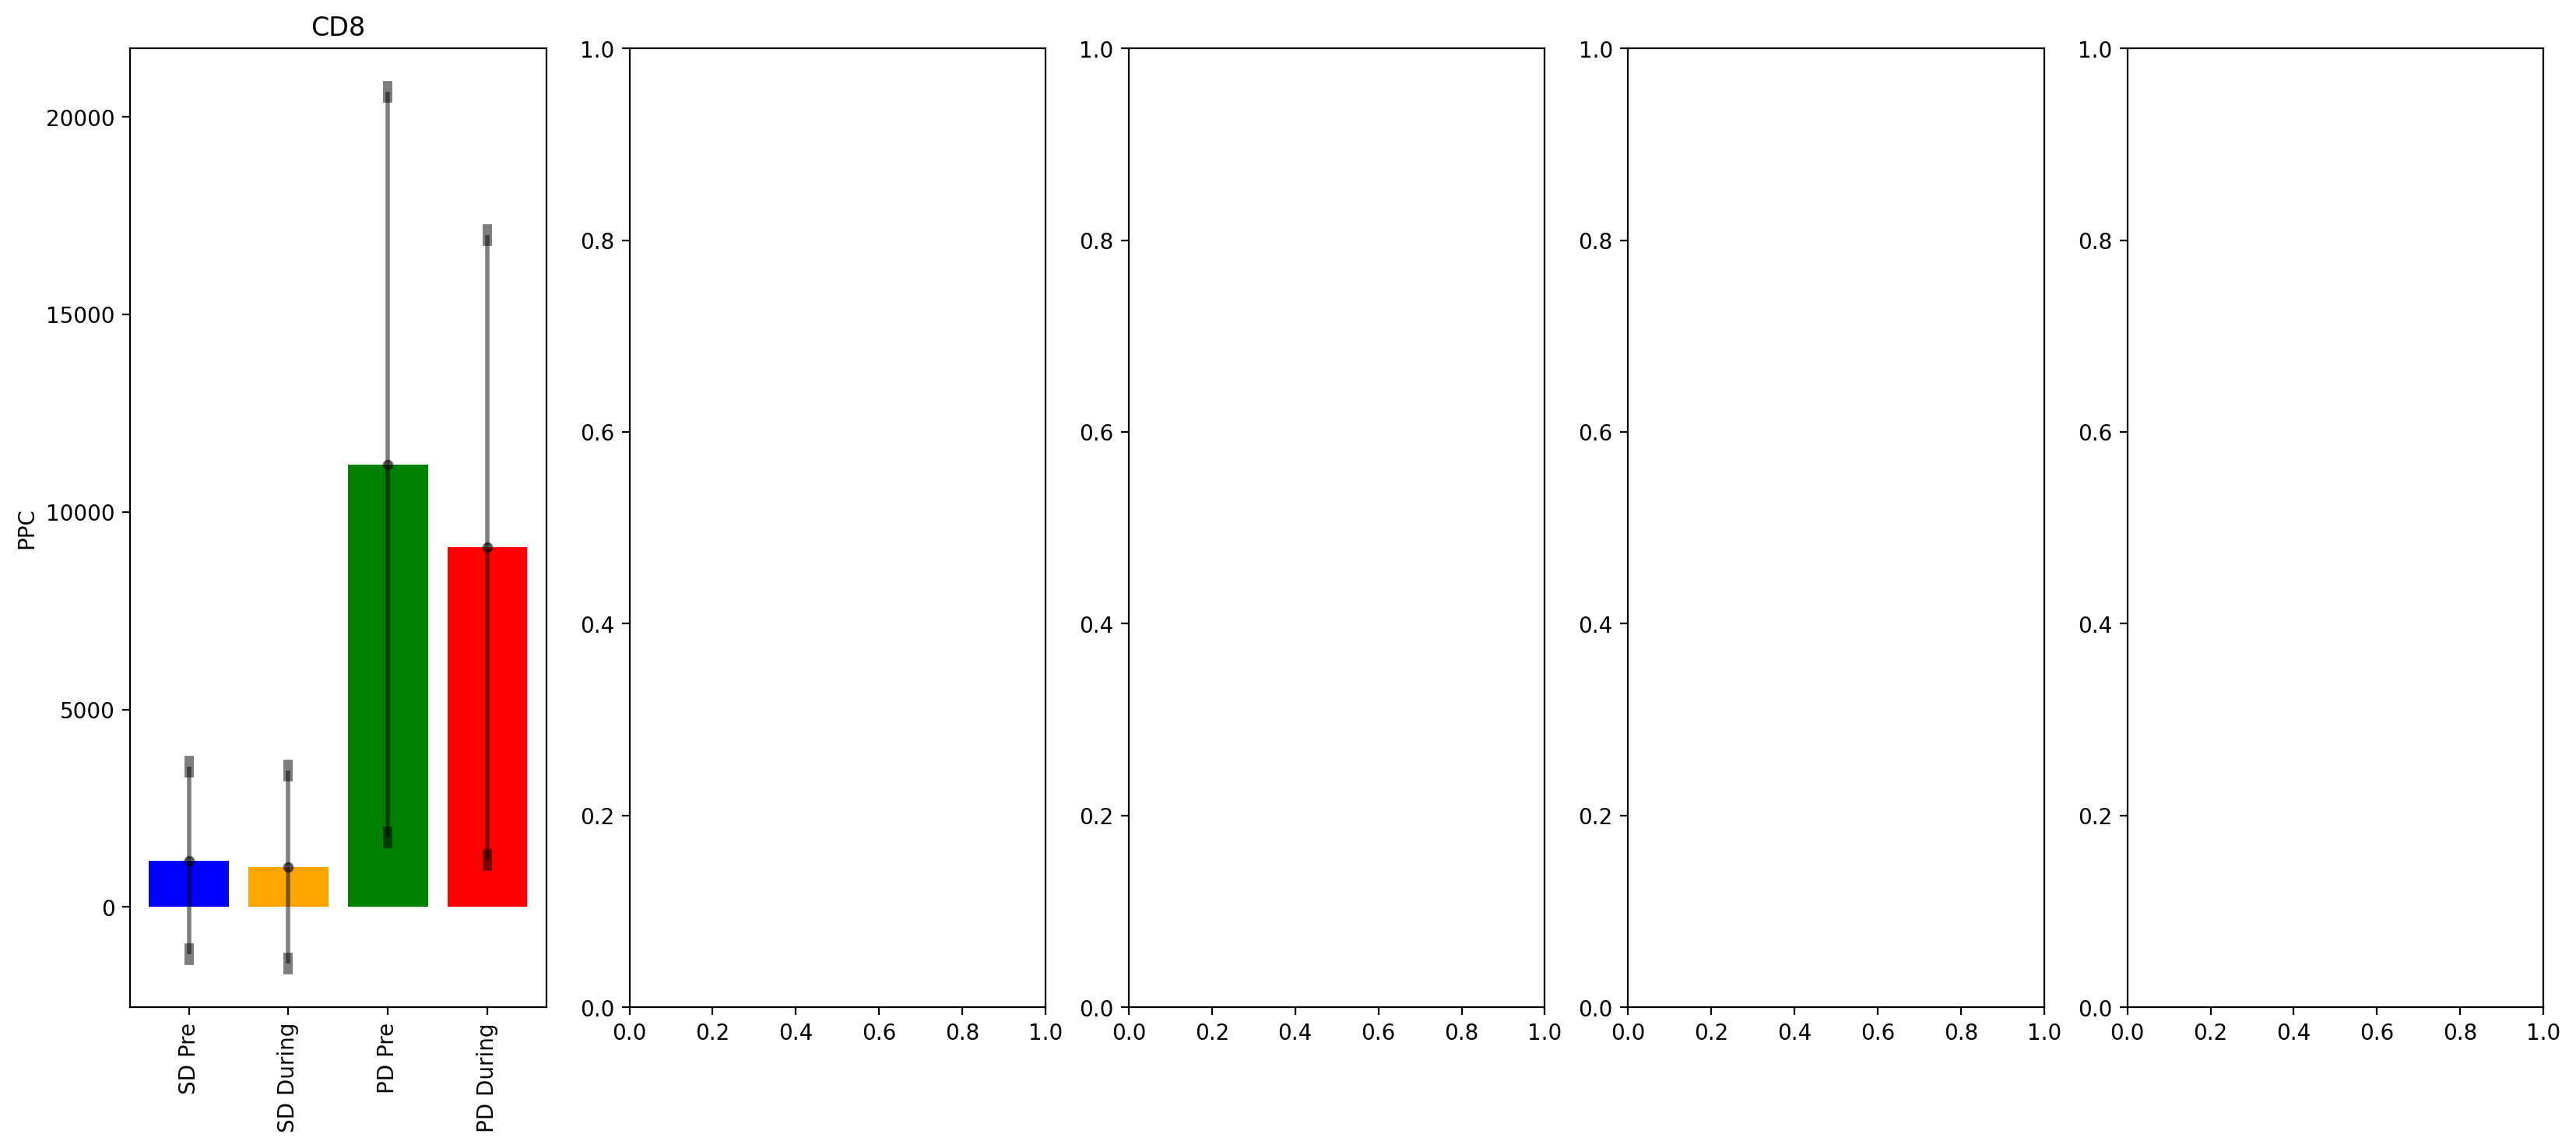

In [67]:
## working on the subplots

fig, axs = plt.subplots(1, 5, figsize=(20,8), dpi=200)


axs[0].bar(x, y, color=['blue','orange','green','red','lightblue','lightblue','lightblue','palegreen','palegreen','palegreen', 'khaki', 'khaki', 'khaki'])
axs[0].set_title('CD8')
axs[0].set_ylabel('PPC')
ind = np.arange(N) 
axs[ 0].set_xticks(ind, ('SD Pre', 'SD During', 'PD Pre', 'PD During'),rotation=90)
axs[ 0].errorbar(x, y, yerr, fmt='o', color='Black', marker='o', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)

#plt.savefig('figure.png', dpi=400, transparent=True)
#plt.show()



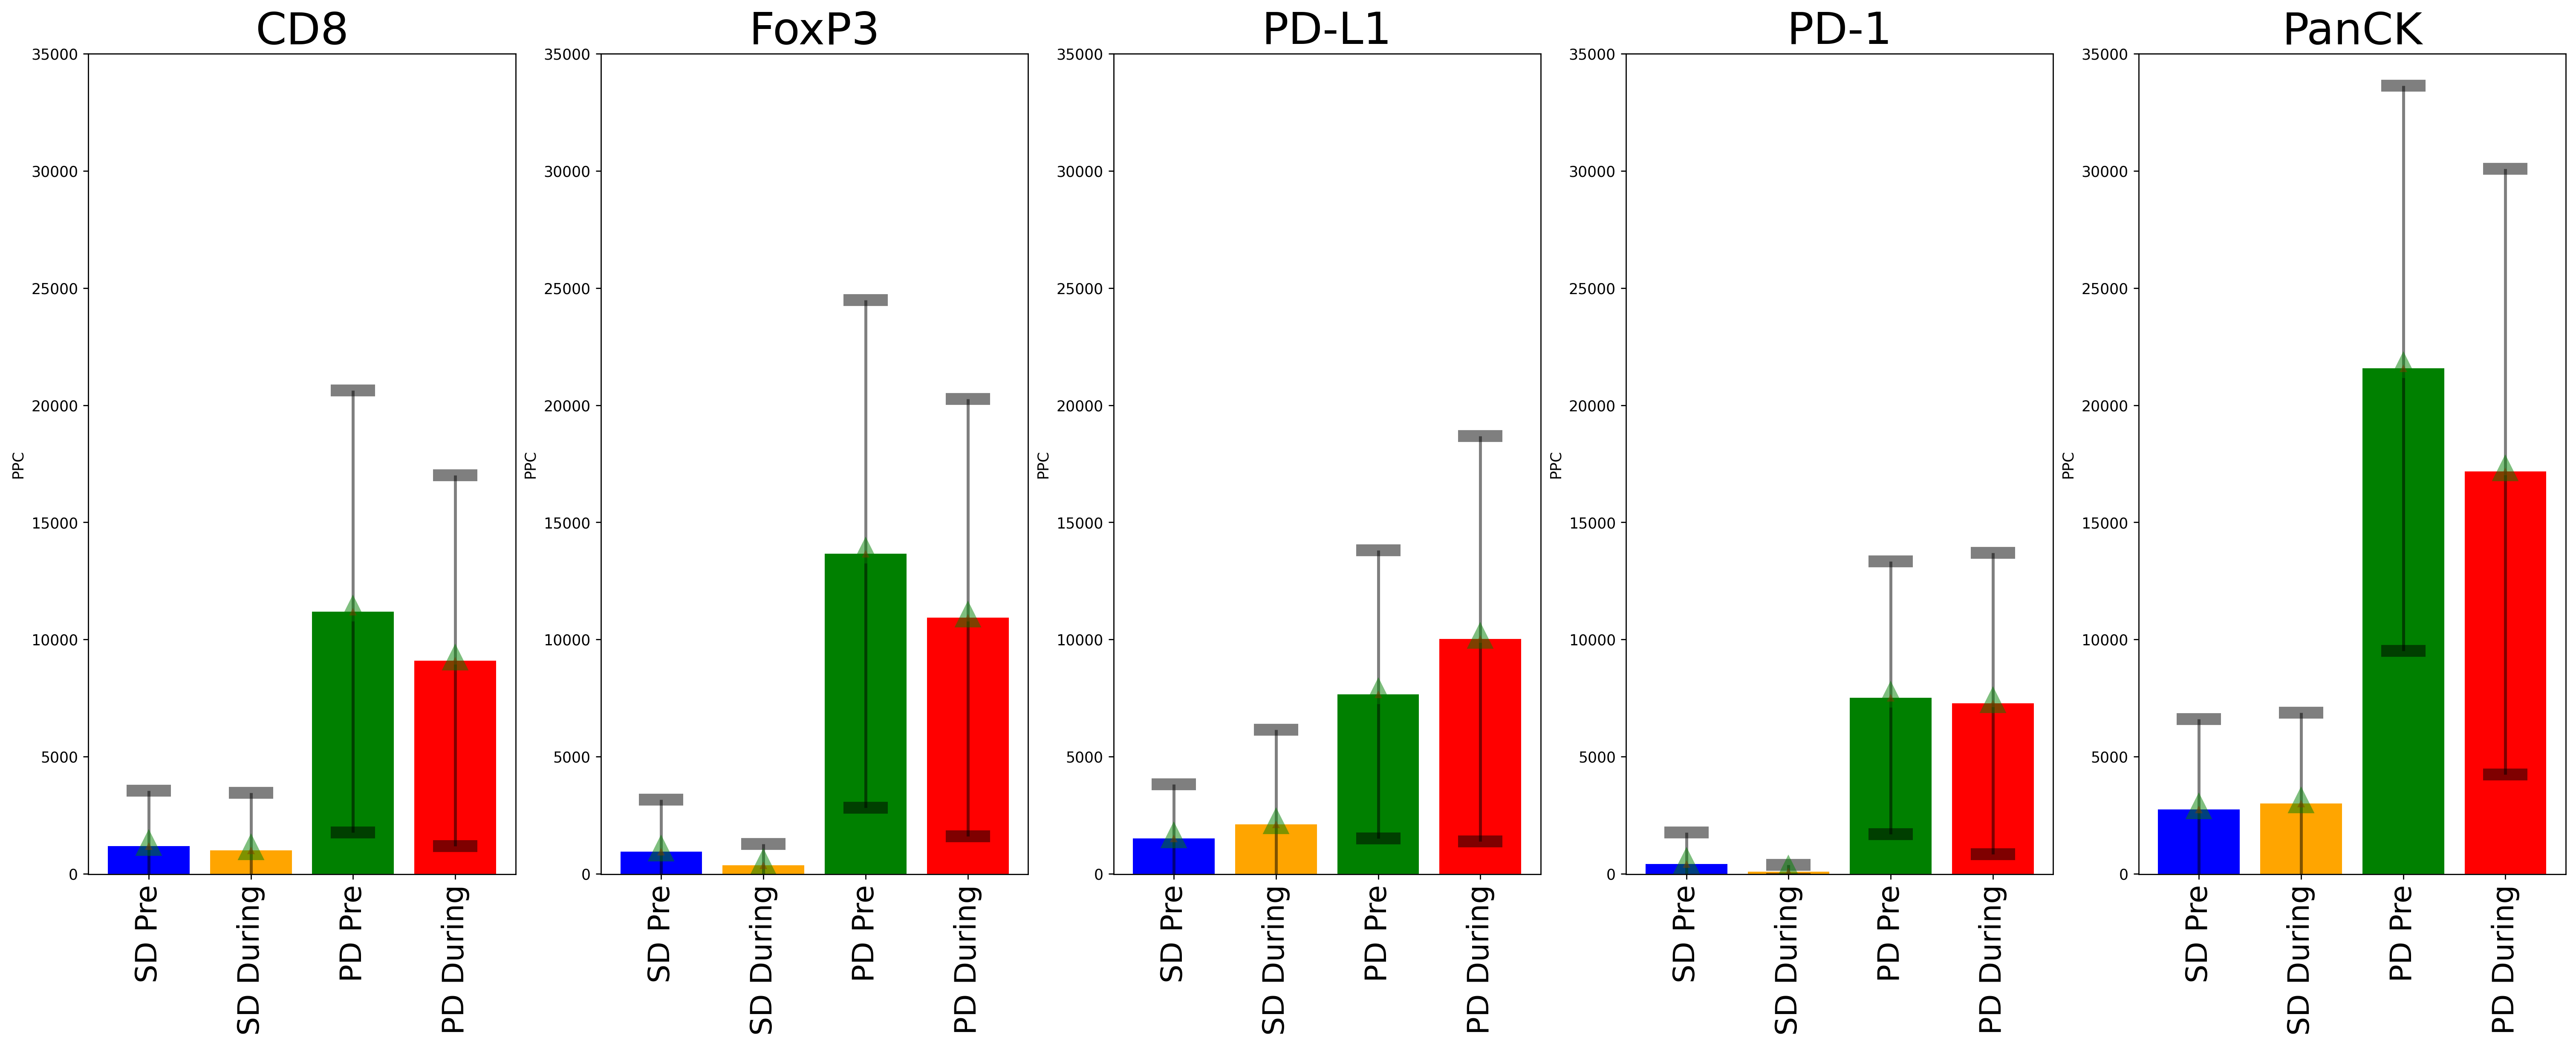

In [68]:
## putting them together

## single plot
import matplotlib.pyplot as plt 
N= 4 #number of timepoints
M = 5 #number of markers
x=[0,1,2,3]
m = np.zeros(4,dtype=float)
s = np.zeros(4,dtype=float)
labels = [sd_pre,sd_on,pd_pre,pd_on]
ind = np.arange(N)
fig, axs = plt.subplots(1, 5, figsize=(30,10), dpi=250)

marker_num = [12,18,21,24,27] #ppc columns
markers_name = ['CD8','FoxP3','PD-L1','PD-1','PanCK']
for n in range(M):
    
    for c in range(N):
        #m[c] = np.log(np.mean(data_CM_1[labels[c],12]))
        #s[c] = np.log(np.std(data_CM_1[labels[c],12]) )
    
    
        m[c] = np.mean(data_CM_1[labels[c],marker_num[n]])
        s[c] = np.std(data_CM_1[labels[c],marker_num[n]])
        
    y=m
    yerr=s

    axs[n].bar(x, y, color=['blue','orange','green','red','lightblue','lightblue','lightblue','palegreen','palegreen','palegreen', 'khaki', 'khaki', 'khaki'])
    axs[n].set_title(markers_name[n], fontsize=30)
    axs[n].set_ylabel('PPC')
    #ind = np.arange(N) 
    axs[n].set_xticks(ind, ('SD Pre', 'SD During', 'PD Pre', 'PD During'),rotation=90,fontsize=20)
    axs[n].errorbar(x, y, yerr, fmt='^', color='Black',  elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=5, 
                    capsize = 15, mfc='red',mec='green', mew=8)

    axs[n].set_ylim((-15, 35000))
#width = 10
#height = 8
#plt.figure(figsize=(width, height),dpi = 200)
#plt.bar(x, y, color=['blue','orange','green','red','lightblue','lightblue','lightblue','palegreen','palegreen','palegreen', 'khaki', 'khaki', 'khaki'])
#plt.title('CD8')
#plt.xlabel('Inhibitor concentration (uM)')
#plt.ylabel('PPC')
 
#plt.xticks(ind, ('SD Pre', 'SD During', 'PD Pre', 'PD During'))#, 'Group5'))
#plt.errorbar(x, y, yerr, fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
plt.savefig('nonspatial_nolog.png', dpi=400, transparent=True)
plt.show()







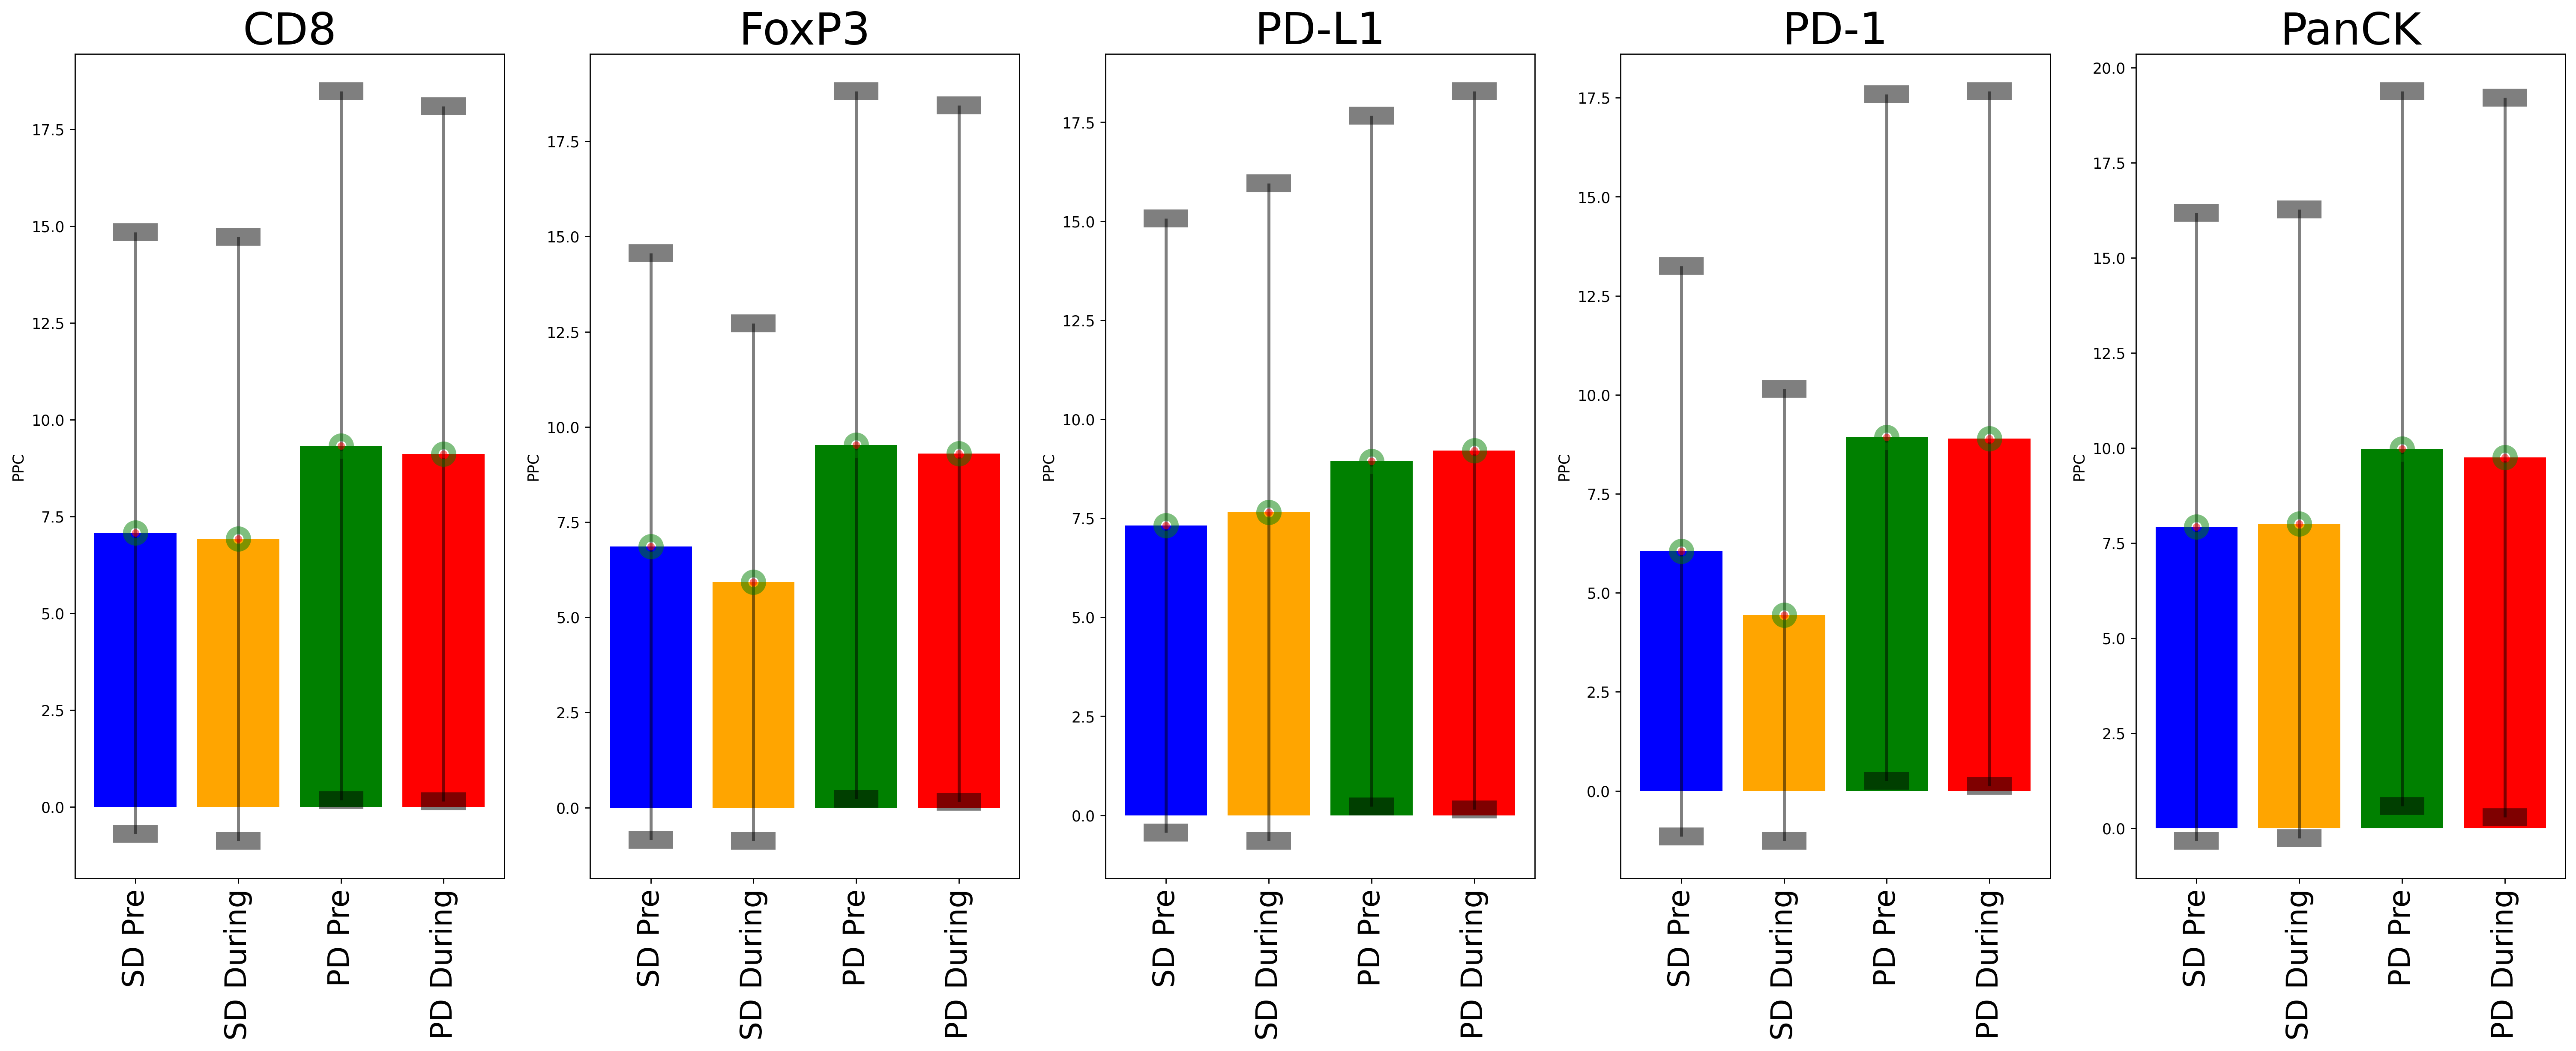

In [69]:
## putting them together in log

## single plot
import matplotlib.pyplot as plt 
N= 4
M = 5 #number of markers
x=[0,1,2,3]
m = np.zeros(4,dtype=float)
s = np.zeros(4,dtype=float)
labels = [sd_pre,sd_on,pd_pre,pd_on]
ind = np.arange(N)
fig, axs = plt.subplots(1, 5, figsize=(30,10), dpi=250)

marker_num = [12,18,21,24,27]
markers_name = ['CD8','FoxP3','PD-L1','PD-1','PanCK']
for n in range(M):
    
    for c in range(N):
        m[c] = np.log(np.mean(data_CM_1[labels[c],marker_num[n]]))
        s[c] = np.log(np.std(data_CM_1[labels[c],marker_num[n]]) )
    
    
        #m[c] = np.mean(data_CM_1[labels[c],marker_num[n]])
        #s[c] = np.std(data_CM_1[labels[c],marker_num[n]])
        
    y=m
    yerr=s

    axs[n].bar(x, y, color=['blue','orange','green','red','lightblue','lightblue','lightblue','palegreen','palegreen','palegreen', 'khaki', 'khaki', 'khaki'])
    axs[n].set_title(markers_name[n], fontsize=30)
    axs[n].set_ylabel('PPC')
    #ind = np.arange(N) 
    axs[n].set_xticks(ind, ('SD Pre', 'SD During', 'PD Pre', 'PD During'),rotation=90,fontsize=20)
    axs[n].errorbar(x, y, yerr, fmt='o', color='Black',  elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=5, 
                    capsize = 15, mfc='red',mec='green', mew=12)
    #axs[n].set_ylim((-15, 35000))
#width = 10
#height = 8
#plt.figure(figsize=(width, height),dpi = 200)
#plt.bar(x, y, color=['blue','orange','green','red','lightblue','lightblue','lightblue','palegreen','palegreen','palegreen', 'khaki', 'khaki', 'khaki'])
#plt.title('CD8')
#plt.xlabel('Inhibitor concentration (uM)')
#plt.ylabel('PPC')
 
#plt.xticks(ind, ('SD Pre', 'SD During', 'PD Pre', 'PD During'))#, 'Group5'))
#plt.errorbar(x, y, yerr, fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)
#plt.tightlayout()
plt.savefig('nonspatial_log.png', dpi=400, transparent=True)
plt.show()







In [70]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

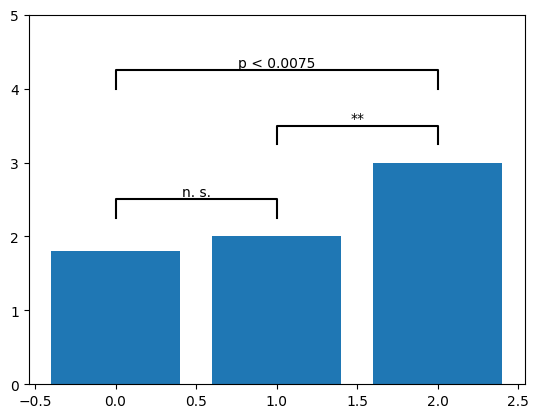

In [71]:
## EXAMPLE FOR PVAL PLOTS
heights = [1.8, 2, 3]
bars = np.arange(len(heights))

plt.figure()
plt.bar(bars, heights, align='center')
plt.ylim(0, 5)
barplot_annotate_brackets(0, 1, .1, bars, heights)
barplot_annotate_brackets(1, 2, .001, bars, heights)
barplot_annotate_brackets(0, 2, 'p < 0.0075', bars, heights, dh=.2)

In [75]:
# Custom function to draw the diff bars

def label_diff(i,j,text,X,Y,numb):
    x = (X[i]+X[j])/2
    y = 1.1*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])

    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':10,'shrinkB':10,'linewidth':2}
    axs[numb].annotate(text, xy=(X[i],y+10000+2000), zorder=10,fontsize=18)#,weight="bold")
    axs[numb].annotate('', xy=(X[i],y+10000), xytext=(X[j],y+10000), arrowprops=props)



In [78]:
# Import the libraries
from scipy import stats
from statsmodels.stats import weightstats
import pingouin as pg

# Define the sample data for two groups
group1 = np.array(data_CM_1[labels[0],marker_num[4]],dtype=float) #[1, 2, 3, 4, 5]
group2 = np.array(data_CM_1[labels[1],marker_num[4]],dtype=float) #[6, 7, 8, 9, 10]

# Perform the two-sample t-test using scipy
t, p = stats.ttest_ind(group1, group2)
print('t = {:.4f}, p = {:.4f}'.format(t, p))

# Perform the mannwhitneyu t-test using scipy
t, p = stats.mannwhitneyu(group1, group2)
print('t = {:.4f}, p = {:.4f}'.format(t, p))

# Perform the two-sample t-test using statsmodels
t, p, df = weightstats.ttest_ind(group1, group2)
print('t = {:.4f}, p = {:.4f}, df = {:.4f}'.format(t, p, df))

# Perform the two-sample t-test using pingouin
df = pg.ttest(group1, group2)
print(df)

t = -1.2538, p = 0.2101
t = 301842.0000, p = 0.0021
t = -1.2538, p = 0.2101, df = 1648.0000
               T          dof alternative     p-val              CI95%  \
T-test -1.252115  1477.215386   two-sided  0.210726  [-621.06, 137.11]   

         cohen-d   BF10     power  
T-test  0.062576  0.122  0.240471  


In [76]:
## create a pval list based on markers from above cell
marker_pval_list = [[0.1584, 3.513720e-80, 4.362775e-69, 6.721629e-82  , 6.448823e-71 ,0.00026],
                    [3.936191e-13, 6.650475e-92, 3.435125e-76, 1.868355e-97, 1.903313e-82, 0.000045],
                    [0.000397, 4.757918e-73, 9.254776e-68, 7.470584e-57, 1.260595e-58, 0.000002],
                    [7.378950e-14, 1.009651e-96, 1.039681e-75, 1.158738e-102, 4.948957e-81,0.5459],
                    [0.21073, 6.104078e-132, 1.527599e-80, 2.838620e-130, 1.822696e-78,1.07e-07]]
#my_formatted_list = [ '%.2f' % elem for elem in marker_pval_list ]

marker_pval_list = list(np.around(np.array(marker_pval_list),15))

In [77]:
marker_pval_list

[array([0.1584 , 0.     , 0.     , 0.     , 0.     , 0.00026]),
 array([3.94e-13, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 4.50e-05]),
 array([3.97e-04, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e-06]),
 array([7.400e-14, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.459e-01]),
 array([2.1073e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0700e-07])]

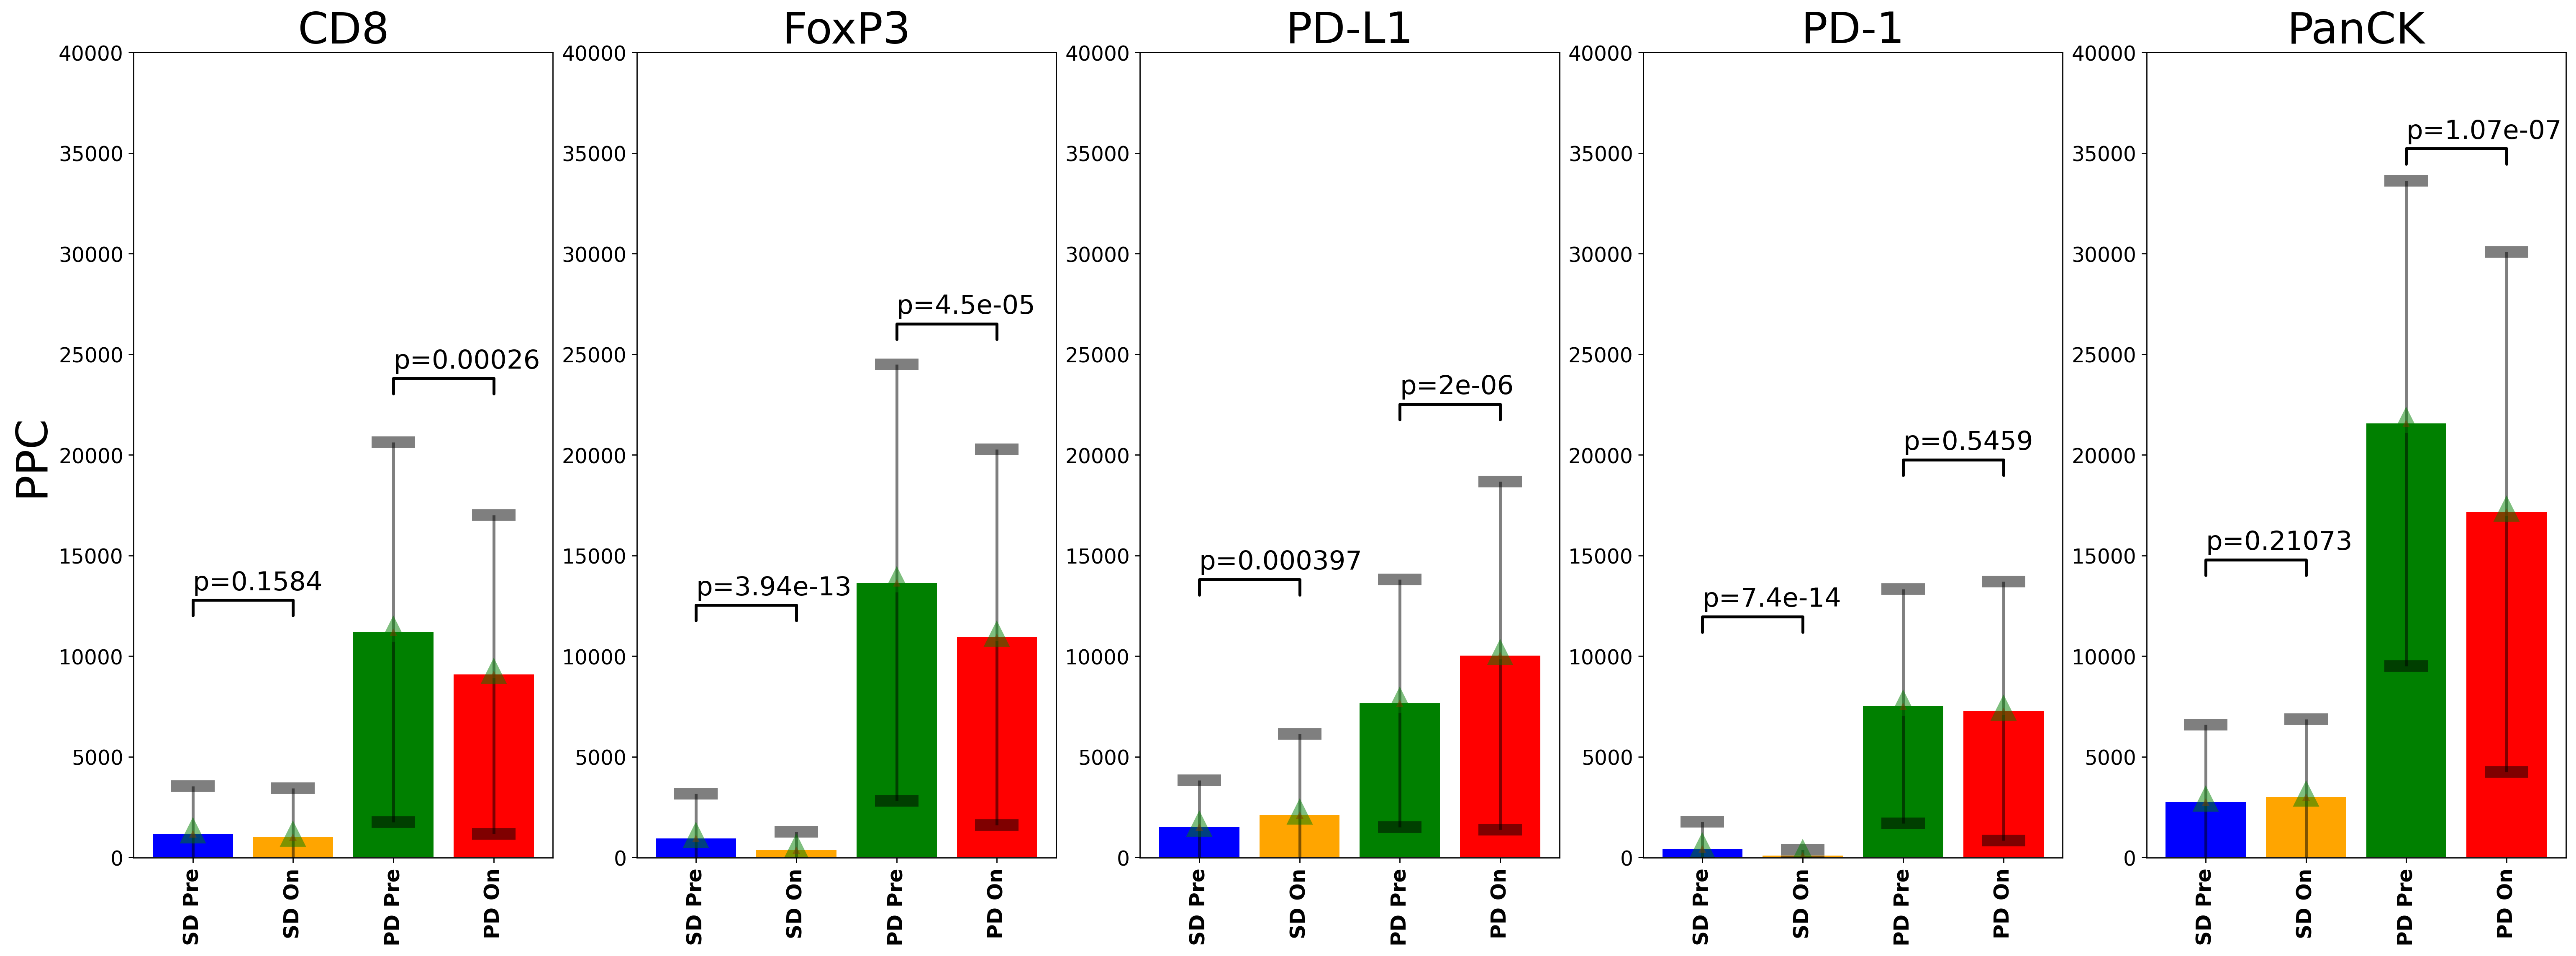

'\nx = "day"\ny = "total_bill"\norder = [\'Sun\', \'Thur\', \'Fri\', \'Sat\']\nax = sns.boxplot(data=df, x=x, y=y, order=order)\nannot = Annotator(ax, [("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")], data=df, x=x, y=y, order=order)\nannot.configure(test=\'Mann-Whitney\', text_format=\'star\', loc=\'outside\', verbose=2)\nannot.apply_test()\nax, test_results = annot.annotate()\nplt.savefig(\'example_non-hue_outside.png\', dpi=300, bbox_inches=\'tight\')\n'

In [79]:
## putting them together in nonlog, with pvals
#matplotlib.rcParams.update({'font.size': 22})

## single plot
import matplotlib.pyplot as plt 
N= 4
M = 5 #number of markers
x=[0,1,2,3]
m = np.zeros(4,dtype=float)
s = np.zeros(4,dtype=float)
labels = [sd_pre,sd_on,pd_pre,pd_on]
ind = np.arange(N)
fig, axs = plt.subplots(1, 5, figsize=(30,10), dpi=250)

marker_num = [12,18,21,24,27]
markers_name = ['CD8','FoxP3','PD-L1','PD-1','PanCK']
for n in range(M): #each marker
    
    for c in range(N): #timepoint
        #m[c] = np.log(np.mean(data_CM_1[labels[c],12]))
        #s[c] = np.log(np.std(data_CM_1[labels[c],12]) )
    
    
        m[c] = np.mean(data_CM_1[labels[c],marker_num[n]])
        s[c] = np.std(data_CM_1[labels[c],marker_num[n]])
        
    y=m
    yerr=s

    axs[n].bar(x, y, color=['blue','orange','green','red','lightblue','lightblue','lightblue','palegreen','palegreen','palegreen', 'khaki', 'khaki', 'khaki'])
    
    '''
    barplot_annotate_brackets(0, 1, .1, x,y)
    barplot_annotate_brackets(1, 2, .001, bars, heights)
    barplot_annotate_brackets(0, 2, 'p < 0.0075', bars, heights, dh=.2)
    '''
    
    ## Call the function
    ind1 = [0,0,0,1,1,2]
    ind2 = [1,2,3,2,3,3]
    for jk in range(6):
        if (marker_pval_list[n][jk]!=0):
            text1 = 'p='+str(marker_pval_list[n][jk])
            label_diff(ind1[jk],ind2[jk],text1,x,y,n)
        
  

    #label_diff(0,1,'p=0.0370',x,y,n)
    #marker_pval_list[n][c]
    
    axs[n].set_title(markers_name[n], fontsize=30)
    axs[0].set_ylabel('PPC',fontsize=30)
    #ind = np.arange(N) 
    axs[n].set_xticks(ind, ('SD Pre', 'SD On', 'PD Pre', 'PD On'),rotation=90,fontsize=25,weight='bold')
    axs[n].errorbar(x, y, yerr, fmt='^', color='Black',  elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=5, 
                    capsize = 15, mfc='red',mec='green', mew=8)
    #axs[n].set_yticks(range(-15,40000),fontsize=20)
    axs[n].tick_params(labelsize=14)
    axs[n].set_ylim((-15, 40000))

plt.savefig('nonspatial_nolog_statsannot.png', dpi=400, transparent=True)
plt.show()




